<a href="https://colab.research.google.com/github/hy30n80/kaggle/blob/main/TPS_September.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
train_path='./drive/MyDrive/TPS9/train.csv'


train = pd.read_csv(train_path)
train.drop('row_id', axis=1, inplace=True)

train_x = train.loc[:,'date':'product']
train_y = train.loc[:,'num_sold']

values = train_x.values
encoder= preprocessing.LabelEncoder()
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

values[:,0]=encoder.fit_transform(values[:,0])
values[:,1]=encoder.fit_transform(values[:,1])
values[:,2]=encoder.fit_transform(values[:,2])
values[:,3]=encoder.fit_transform(values[:,3])

values=values.astype('float32')
scaled = scaler.fit_transform(values)
scaled[:,0]= scaled[:,0]%0.25
train_x= pd.DataFrame(scaled)

train_x=np.array(train_x)
train_y=np.array(train_y)

train_x.shape


(70128, 4)

In [ ]:
test_path='./drive/MyDrive/TPS9/test.csv'
test = pd.read_csv(test_path)

test.drop('row_id', axis=1, inplace=True)

test_x = test.loc[:,'date':'product']

values = test_x.values
encoder= preprocessing.LabelEncoder()
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

values[:,0]=encoder.fit_transform(values[:,0])
values[:,1]=encoder.fit_transform(values[:,1])
values[:,2]=encoder.fit_transform(values[:,2])
values[:,3]=encoder.fit_transform(values[:,3])

values=values.astype('float32')
scaled = scaler.fit_transform(values)
scaled[:,0]= scaled[:,0]%0.25
test_x= pd.DataFrame(scaled)

test_x=np.array(test_x)

test_x.shape

(17520, 4)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, input_shape=[4], activation='relu'),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
    tf.keras.layers.Lambda(lambda x: x * 1000)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

model.fit(train_x, train_y, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
2192/2192 [==============================] - 4s 2ms/step - loss: 299.2785 - mae: 299.7784 - lr: 1.0000e-08
Epoch 2/100
2192/2192 [==============================] - 4s 2ms/step - loss: 266.7973 - mae: 267.2971 - lr: 1.1220e-08
Epoch 3/100
2192/2192 [==============================] - 4s 2ms/step - loss: 234.2370 - mae: 234.7367 - lr: 1.2589e-08
Epoch 4/100
2192/2192 [==============================] - 4s 2ms/step - loss: 199.6564 - mae: 200.1559 - lr: 1.4125e-08
Epoch 5/100
2192/2192 [==============================] - 3s 2ms/step - loss: 167.3563 - mae: 167.8558 - lr: 1.5849e-08
Epoch 6/100
2192/2192 [==============================] - 4s 2ms/step - loss: 138.8271 - mae: 139.3266 - lr: 1.7783e-08
Epoch 7/100
2192/2192 [==============================] - 4s 2ms/step - loss: 115.7264 - mae: 116.2258 - lr: 1.9953e-08
Epoch 8/100
2192/2192 [==============================] - 4s 2ms/step - loss: 98.4237 - mae: 98.9230 - lr: 2.2387e-08
Epoch 9/100
2192/2192 [===========================

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

model.fit(train_x, train_y, epochs=50, callbacks=[lr_schedule])

Epoch 1/50
2192/2192 [==============================] - 4s 2ms/step - loss: 30.5088 - mae: 31.0031 - lr: 1.0000e-08
Epoch 2/50
2192/2192 [==============================] - 4s 2ms/step - loss: 30.4611 - mae: 30.9556 - lr: 1.1220e-08
Epoch 3/50
2192/2192 [==============================] - 4s 2ms/step - loss: 30.4112 - mae: 30.9056 - lr: 1.2589e-08
Epoch 4/50
2192/2192 [==============================] - 4s 2ms/step - loss: 30.3592 - mae: 30.8537 - lr: 1.4125e-08
Epoch 5/50
2192/2192 [==============================] - 3s 2ms/step - loss: 30.3059 - mae: 30.8004 - lr: 1.5849e-08
Epoch 6/50
2192/2192 [==============================] - 4s 2ms/step - loss: 30.2510 - mae: 30.7456 - lr: 1.7783e-08
Epoch 7/50
2192/2192 [==============================] - 4s 2ms/step - loss: 30.1948 - mae: 30.6894 - lr: 1.9953e-08
Epoch 8/50
2192/2192 [==============================] - 5s 2ms/step - loss: 30.1379 - mae: 30.6323 - lr: 2.2387e-08
Epoch 9/50
2192/2192 [==============================] - 3s 2ms/step - lo

In [ ]:
y_predict = model.predict(test_x)

In [ ]:

with open("./drive/MyDrive/TPS9/result.csv",'w') as file:
  writer = csv.writer(file)
  writer.writerow(['row_id','num_sold'])
  for i in range(0, y_predict.shape[0]):
    writer.writerow([i+70128,y_predict[i][0]])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 4)                 0         
                                                                 
 dense_20 (Dense)            (None, 128)               640       
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
 lambda_4 (Lambda)           (None, 1)                

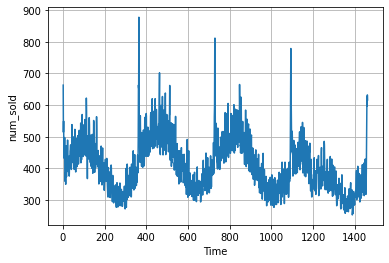

In [ ]:
train_plt = []
for i in range(0,train.shape[0],48):
  train_plt.append(train.loc[i,'num_sold'])

time = np.arange(1,len(train_plt)+1)
train_plt = np.array(train_plt)

plot_series(time, train_plt)
